In [1]:
import pandas as pd
import numpy as np

import pylab as plt
from scipy import stats
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,  mean_absolute_percentage_error
from catboost import CatBoostRegressor
import sklearn

import pickle
import time
import random

import plotly.graph_objects as go

Загрузка моделей

In [2]:
model_1 = pickle.load(open('models_v5/model_1.pkl','rb'))
model_2 = pickle.load(open('models_v5/model_2.pkl','rb'))
model_4 = pickle.load(open('models_v5/model_4.pkl','rb'))
model_8 = pickle.load(open('models_v5/model_8.pkl','rb'))

Работа с данными

In [3]:
X = np.loadtxt('models_v5/X.out')
y = np.loadtxt('models_v5/y.out')

In [4]:
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size = 0.2, random_state = 123)

pt_ = pickle.load(open('models_v5/standard_scaler.pkl','rb'))
              
train_X_poly = train_X
val_X_poly = val_X

In [5]:
def metrics(predicted, val_X, val_y, n):
    """ Вывод метрик для моделей """
    R2 = r2_score(val_y, predicted)
    Adj_R2 = 1 - (1-R2)*(len(val_y)-1)/(len(val_y)-val_X_poly.shape[1]-1)
    print(f'R-squared ({n}) = {R2:.3f}')
    print(f'Adjusted R-squared ({n}) = {Adj_R2:.3f}')
    print(f'MAE ({n}) = {mean_absolute_error(val_y, predicted)}')
    print(f'MAPE ({n}) = {mean_absolute_percentage_error(val_y, predicted)}')

In [6]:
%%time
print('*** train ***')
predicted1_train = model_1.predict(train_X_poly)
metrics(predicted1_train, train_X_poly, train_y[:, 0], 1)
print('\n*** test ***')
predicted1 = model_1.predict(val_X_poly)
metrics(predicted1, val_X_poly, val_y[:, 0], 1)

*** train ***
R-squared (1) = 0.974
Adjusted R-squared (1) = 0.974
MAE (1) = 1.7332464465975457
MAPE (1) = 0.24294551571402934

*** test ***
R-squared (1) = 0.820
Adjusted R-squared (1) = 0.820
MAE (1) = 4.671799513335434
MAPE (1) = 0.47938948295321593
CPU times: user 15.3 s, sys: 3.28 s, total: 18.6 s
Wall time: 10.5 s


In [7]:
%%time
print('*** train ***')
predicted2_train = model_2.predict(train_X_poly)
metrics(predicted2_train, train_X_poly, train_y[:, 1], 2)
print('\n*** test ***')
predicted2 = model_2.predict(val_X_poly)
metrics(predicted2, val_X_poly, val_y[:, 1], 2)

*** train ***
R-squared (2) = 0.970
Adjusted R-squared (2) = 0.970
MAE (2) = 1.828416229475578
MAPE (2) = 0.2054927046755991

*** test ***
R-squared (2) = 0.788
Adjusted R-squared (2) = 0.788
MAE (2) = 4.895180536970326
MAPE (2) = 0.5577620401528162
CPU times: user 15.4 s, sys: 2.74 s, total: 18.1 s
Wall time: 9.58 s


In [8]:
%%time
print('*** train ***')
predicted4_train = model_4.predict(train_X_poly)
metrics(predicted4_train, train_X_poly, train_y[:, 2], 4)
print('\n*** test ***')
predicted4 = model_4.predict(val_X_poly)
metrics(predicted4, val_X_poly, val_y[:, 2], 4)

*** train ***
R-squared (4) = 0.967
Adjusted R-squared (4) = 0.967
MAE (4) = 1.9283843695290437
MAPE (4) = 0.45773263583987756

*** test ***
R-squared (4) = 0.771
Adjusted R-squared (4) = 0.771
MAE (4) = 5.18182714436252
MAPE (4) = 0.8012150730947213
CPU times: user 15.7 s, sys: 2.87 s, total: 18.5 s
Wall time: 9.73 s


In [9]:
%%time
print('*** train ***')
predicted8_train = model_8.predict(train_X_poly)
metrics(predicted8_train, train_X_poly, train_y[:, 3], 8)
print('\n*** test ***')
predicted8 = model_8.predict(val_X_poly)
metrics(predicted8, val_X_poly, val_y[:, 3], 8)

*** train ***
R-squared (8) = 0.964
Adjusted R-squared (8) = 0.964
MAE (8) = 1.8134424224318133
MAPE (8) = 0.8586608234559394

*** test ***
R-squared (8) = 0.749
Adjusted R-squared (8) = 0.749
MAE (8) = 4.855407127397268
MAPE (8) = 1.708443175190642
CPU times: user 15.9 s, sys: 2.86 s, total: 18.7 s
Wall time: 9.77 s


In [10]:
def moving_averages(arr, window=3):
    """ Функция для скользящего среднего """
    df = pd.Series(arr)
    moving_averages = df.rolling(window=window).mean()
    return moving_averages.values

In [11]:
window_ = 500

### Train 

In [12]:
x_n_name = ['TEMP', 'AIR']
preds_name = ['1л', '2л', '4л', '8л']
colors = [['#2B3467', '#EB455F'], ['#293462', '#FEDB39']]

In [13]:
inv_train_X = pt_.inverse_transform(train_X)
fully_averages_train = pd.DataFrame()

fully_averages_train['pred1'] = predicted1_train
fully_averages_train['pred2'] = predicted2_train
fully_averages_train['pred4'] = predicted4_train
fully_averages_train['pred8'] = predicted8_train

fully_averages_train['temp'] = inv_train_X[:,1]
fully_averages_train['air'] = inv_train_X[:,2]
fully_averages_train['val_y1'] = train_y[:, 0]
fully_averages_train['val_y2'] = train_y[:, 1]
fully_averages_train['val_y4'] = train_y[:, 2]
fully_averages_train['val_y8'] = train_y[:, 3]

In [14]:
fully_averages_t_train = fully_averages_train.sort_values(by=['temp'])

train_pred_ma1_t = moving_averages(fully_averages_t_train['pred1'].values, window=window_)
train_pred_ma2_t = moving_averages(fully_averages_t_train['pred2'].values, window=window_)
train_pred_ma4_t = moving_averages(fully_averages_t_train['pred4'].values, window=window_)
train_pred_ma8_t = moving_averages(fully_averages_t_train['pred8'].values, window=window_)

train_val_ma1_t = moving_averages(fully_averages_t_train['val_y1'], window=window_)
train_val_ma2_t = moving_averages(fully_averages_t_train['val_y2'], window=window_)
train_val_ma4_t = moving_averages(fully_averages_t_train['val_y4'], window=window_)
train_val_ma8_t = moving_averages(fully_averages_t_train['val_y8'], window=window_)

moving_averages_preds_temp_train = [train_pred_ma1_t, train_pred_ma2_t, train_pred_ma4_t, train_pred_ma8_t]
moving_averages_vals_temp_train = [train_val_ma1_t, train_val_ma2_t, train_val_ma4_t, train_val_ma8_t]
preds_train = [fully_averages_train['pred1'], fully_averages_train['pred2'], 
             fully_averages_train['pred4'], fully_averages_train['pred8']]

temp_train = fully_averages_t_train.temp.values

In [15]:
fully_averages_a_train = fully_averages_train.sort_values(by=['air'])

air_train = fully_averages_a_train.air.values
                                                          
train_pred_ma1_a = moving_averages(fully_averages_a_train['pred1'].values, window=window_)
train_pred_ma2_a = moving_averages(fully_averages_a_train['pred2'].values, window=window_)
train_pred_ma4_a = moving_averages(fully_averages_a_train['pred4'].values, window=window_)
train_pred_ma8_a = moving_averages(fully_averages_a_train['pred8'].values, window=window_)

train_val_ma1_a = moving_averages(fully_averages_a_train['val_y1'], window=window_)
train_val_ma2_a = moving_averages(fully_averages_a_train['val_y2'], window=window_)
train_val_ma4_a = moving_averages(fully_averages_a_train['val_y4'], window=window_)
train_val_ma8_a = moving_averages(fully_averages_a_train['val_y8'], window=window_)

moving_averages_preds_air_train = [train_pred_ma1_a, train_pred_ma2_a, train_pred_ma4_a, train_pred_ma8_a]
moving_averages_vals_air_train = [train_val_ma1_a, train_val_ma2_a, train_val_ma4_a, train_val_ma8_a]


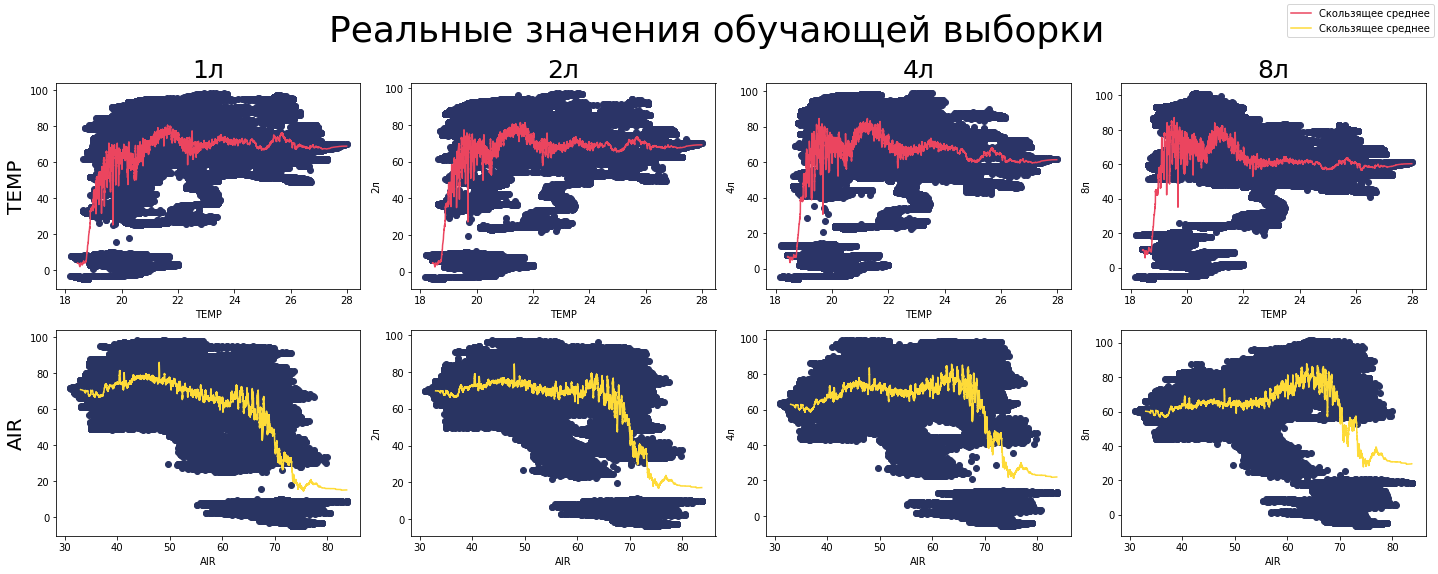

In [16]:
x_n = [temp_train, air_train]
x_n_original = [fully_averages_train['temp'].values, fully_averages_train['air'].values]

moving_averages_vals_train = [moving_averages_vals_temp_train, moving_averages_vals_air_train]
moving_averages_preds_train = [moving_averages_preds_temp_train, moving_averages_preds_air_train]


fig, axs = plt.subplots(len(x_n_name), len(preds_name), figsize=(20,8))

for idx_x in range(len(x_n_name)):
    color=colors[idx_x]
    for idx_y in range(len(preds_name)):
        axs[idx_x, idx_y].scatter(x=x_n_original[idx_x], y=train_y[:, idx_y], c=color[0])
        axs[idx_x, idx_y].plot(x_n[idx_x], moving_averages_vals_train[idx_x][idx_y], c=color[1],label='Скользящее среднее')
        
        axs[idx_x, idx_y].set_xlabel(x_n_name[idx_x])
        axs[idx_x, idx_y].set_ylabel(preds_name[idx_y])
        
for ax, col in zip(axs[0], preds_name):
    ax.set_title(col, fontsize=25, fontweight=25)

for ax, row in zip(axs[:,0], x_n_name):
    ax.set_ylabel(row, fontsize=20, fontweight=25)

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
lines = [lines[0], lines[-1]]
labels = [labels[0], labels[-1]]
fig.legend(lines, labels)
fig.suptitle('Реальные значения обучающей выборки', fontsize=36, fontweight=25)
fig.tight_layout()
plt.show()

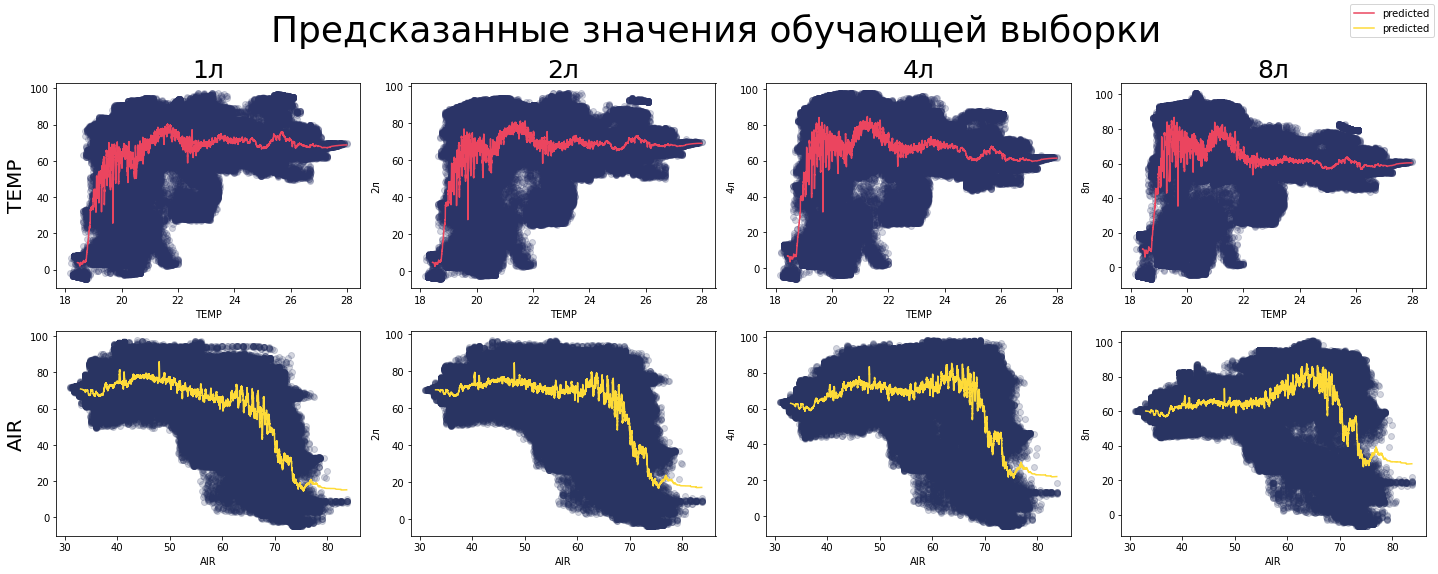

In [17]:
fig, axs = plt.subplots(len(x_n_name), len(preds_name), figsize=(20,8))

for idx_x in range(len(x_n_name)):
    color=colors[idx_x]
    for idx_y in range(len(preds_name)):
        axs[idx_x, idx_y].scatter(x=x_n_original[idx_x], y=preds_train[idx_y], alpha=0.2, c=color[0])
        axs[idx_x, idx_y].plot(x_n[idx_x], moving_averages_preds_train[idx_x][idx_y], c=color[1],label='predicted')
        
        axs[idx_x, idx_y].set_xlabel(x_n_name[idx_x])
        axs[idx_x, idx_y].set_ylabel(preds_name[idx_y])
        
for ax, col in zip(axs[0], preds_name):
    ax.set_title(col, fontsize=25, fontweight=25)

for ax, row in zip(axs[:,0], x_n_name):
    ax.set_ylabel(row, fontsize=20, fontweight=25)

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
lines = [lines[0], lines[-1]]
labels = [labels[0], labels[-1]]
fig.legend(lines, labels)
fig.suptitle('Предсказанные значения обучающей выборки', fontsize=36, fontweight=25)
fig.tight_layout()
plt.show()

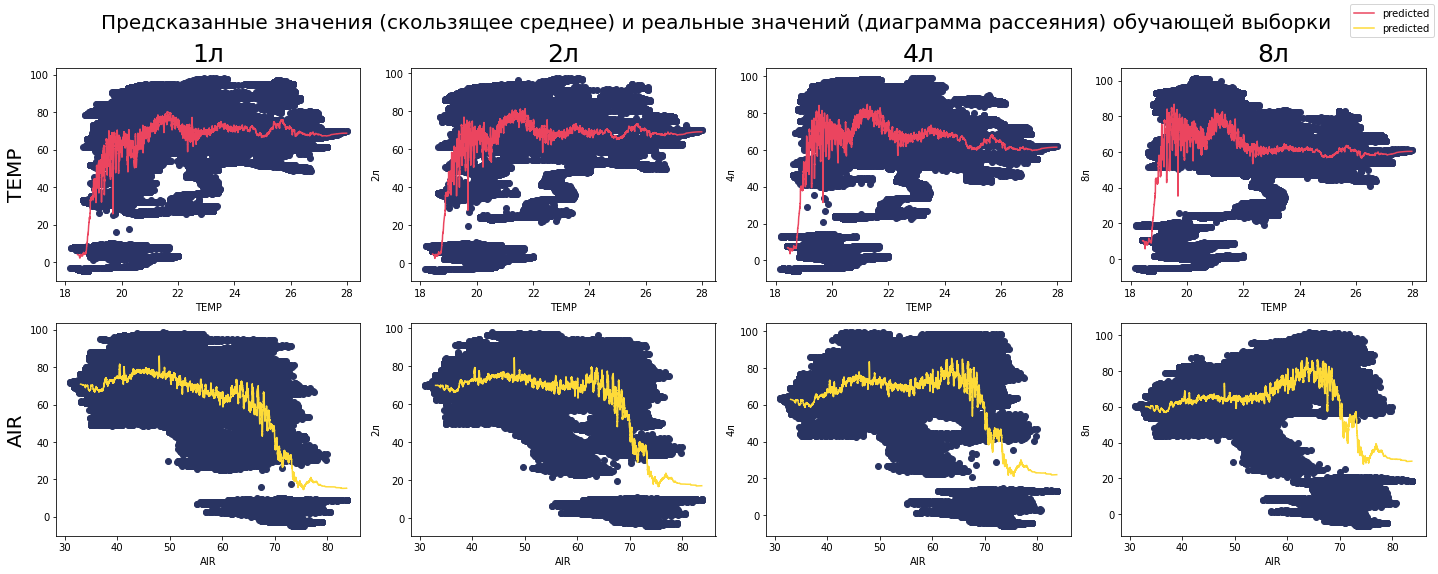

In [18]:
fig, axs = plt.subplots(len(x_n_name), len(preds_name), figsize=(20,8))

for idx_x in range(len(x_n_name)):
    color=colors[idx_x]
    for idx_y in range(len(preds_name)):
        axs[idx_x, idx_y].scatter(x=x_n_original[idx_x], y=train_y[:, idx_y], c=color[0])
        axs[idx_x, idx_y].plot(x_n[idx_x], moving_averages_preds_train[idx_x][idx_y], c=color[1], label='predicted')
        
        axs[idx_x, idx_y].set_xlabel(x_n_name[idx_x])
        axs[idx_x, idx_y].set_ylabel(preds_name[idx_y])
        
for ax, col in zip(axs[0], preds_name):
    ax.set_title(col, fontsize=25, fontweight=25)

for ax, row in zip(axs[:,0], x_n_name):
    ax.set_ylabel(row, fontsize=20, fontweight=25)

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
lines = [lines[0], lines[-1]]
labels = [labels[0], labels[-1]]
fig.legend(lines, labels)
fig.suptitle('Предсказанные значения (скользящее среднее) и реальные значений (диаграмма рассеяния) обучающей выборки', 
             fontsize=20, fontweight=25)
fig.tight_layout()
plt.show()

### Test 

In [19]:
inv_val_X = pt_.inverse_transform(val_X)
fully_averages_val = pd.DataFrame()

fully_averages_val['pred1'] = predicted1
fully_averages_val['pred2'] = predicted2
fully_averages_val['pred4'] = predicted4
fully_averages_val['pred8'] = predicted8

fully_averages_val['temp'] = inv_val_X[:,1]
fully_averages_val['air'] = inv_val_X[:,2]
fully_averages_val['val_y1'] = val_y[:, 0]
fully_averages_val['val_y2'] = val_y[:, 1]
fully_averages_val['val_y4'] = val_y[:, 2]
fully_averages_val['val_y8'] = val_y[:, 3]

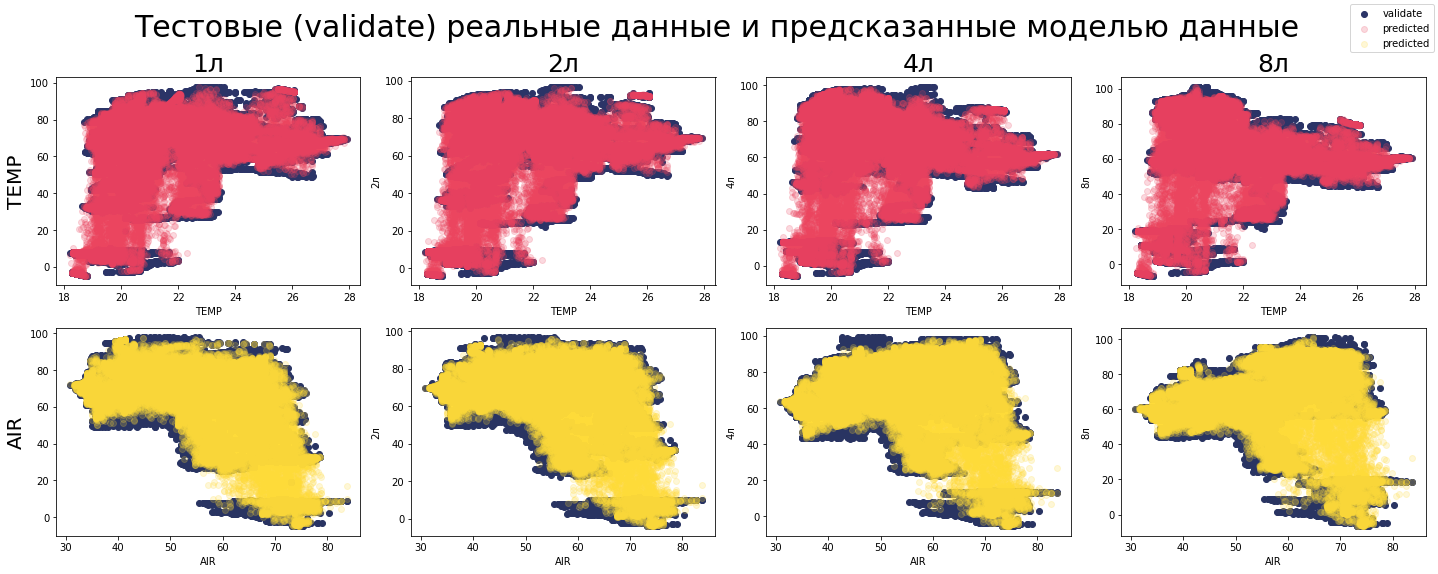

In [20]:
x_n = [fully_averages_val['temp'].values, fully_averages_val['air'].values]
x_n_name = ['TEMP', 'AIR']
preds_name = ['1л', '2л', '4л', '8л']
preds = [predicted1, predicted2, predicted4, predicted8]

fig, axs = plt.subplots(len(x_n_name), len(preds_name), figsize=(20,8))

colors = [['#2B3467', '#EB455F'], ['#293462', '#FEDB39']]

for idx_x in range(len(x_n_name)):
    color=colors[idx_x]
    for idx_y in range(len(preds_name)):
        axs[idx_x, idx_y].scatter(x=x_n[idx_x], y=val_y[:, idx_y], c=color[0], label='validate')
        axs[idx_x, idx_y].scatter(x=x_n[idx_x], y=preds[idx_y], alpha=0.2, c=color[1], label='predicted')
        axs[idx_x, idx_y].set_xlabel(x_n_name[idx_x])
        axs[idx_x, idx_y].set_ylabel(preds_name[idx_y])
        
for ax, col in zip(axs[0], preds_name):
    ax.set_title(col, fontsize=25, fontweight=25)

for ax, row in zip(axs[:,0], x_n_name):
    ax.set_ylabel(row, fontsize=20, fontweight=25)

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
lines = [lines[0], lines[1], lines[-1]]
labels = [labels[0], labels[1], labels[-1]]
fig.legend(lines, labels)
fig.suptitle('Тестовые (validate) реальные данные и предсказанные моделью данные', fontsize=30, fontweight=25)
fig.tight_layout()
plt.show()

In [21]:
fully_averages_t_val = fully_averages_val.sort_values(by=['temp'])

val_pred_ma1_t = moving_averages(fully_averages_t_val['pred1'].values, window=window_)
val_pred_ma2_t = moving_averages(fully_averages_t_val['pred2'].values, window=window_)
val_pred_ma4_t = moving_averages(fully_averages_t_val['pred4'].values, window=window_)
val_pred_ma8_t = moving_averages(fully_averages_t_val['pred8'].values, window=window_)

val_val_ma1_t = moving_averages(fully_averages_t_val['val_y1'], window=window_)
val_val_ma2_t = moving_averages(fully_averages_t_val['val_y2'], window=window_)
val_val_ma4_t = moving_averages(fully_averages_t_val['val_y4'], window=window_)
val_val_ma8_t = moving_averages(fully_averages_t_val['val_y8'], window=window_)

moving_averages_preds_temp_val = [val_pred_ma1_t, val_pred_ma2_t, val_pred_ma4_t, val_pred_ma8_t]
moving_averages_vals_temp_val = [val_val_ma1_t, val_val_ma2_t, val_val_ma4_t, val_val_ma8_t]
preds_val = [fully_averages_val['pred1'], fully_averages_val['pred2'], 
             fully_averages_val['pred4'], fully_averages_val['pred8']]

temp_val = fully_averages_t_val.temp.values

In [22]:
fully_averages_a_val = fully_averages_val.sort_values(by=['air'])

air_val = fully_averages_a_val.air.values
                                                          
val_pred_ma1_a = moving_averages(fully_averages_a_val['pred1'].values, window=window_)
val_pred_ma2_a = moving_averages(fully_averages_a_val['pred2'].values, window=window_)
val_pred_ma4_a = moving_averages(fully_averages_a_val['pred4'].values, window=window_)
val_pred_ma8_a = moving_averages(fully_averages_a_val['pred8'].values, window=window_)

val_val_ma1_a = moving_averages(fully_averages_a_val['val_y1'], window=window_)
val_val_ma2_a = moving_averages(fully_averages_a_val['val_y2'], window=window_)
val_val_ma4_a = moving_averages(fully_averages_a_val['val_y4'], window=window_)
val_val_ma8_a = moving_averages(fully_averages_a_val['val_y8'], window=window_)

moving_averages_preds_air_val = [val_pred_ma1_a, val_pred_ma2_a, val_pred_ma4_a, val_pred_ma8_a]
moving_averages_vals_air_val = [val_val_ma1_a, val_val_ma2_a, val_val_ma4_a, val_val_ma8_a]


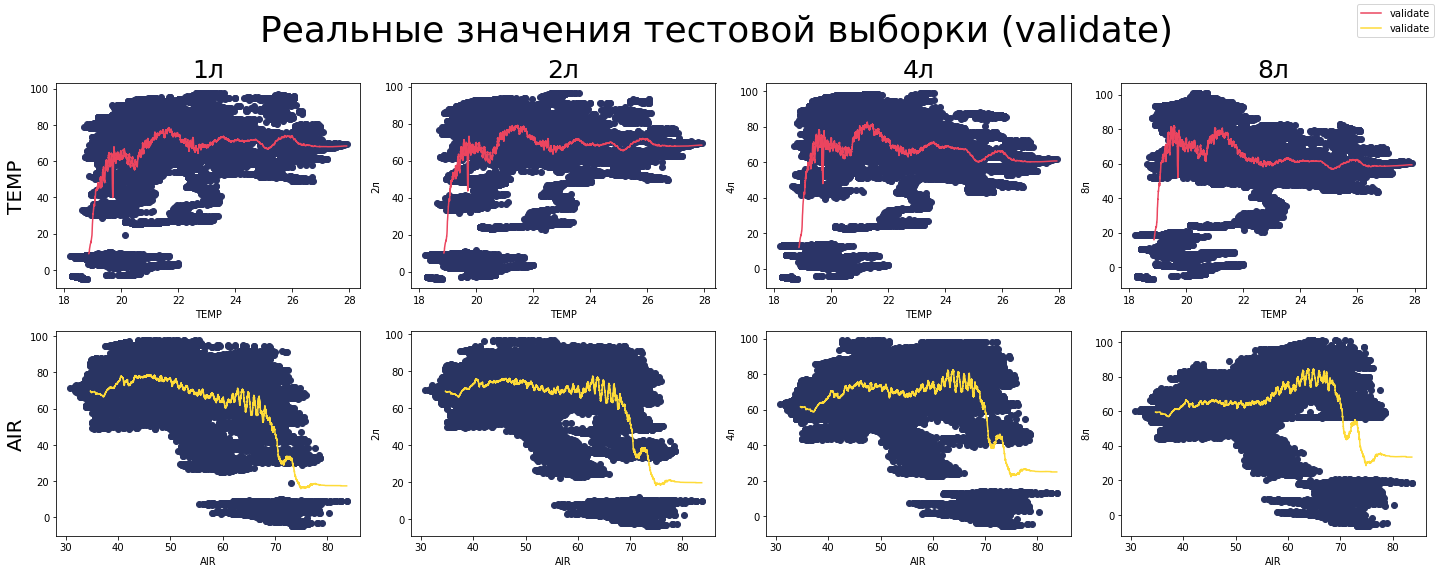

In [23]:
x_n = [temp_val, air_val]
x_n_original = [fully_averages_val['temp'].values, fully_averages_val['air'].values]

moving_averages_vals_val = [moving_averages_vals_temp_val, moving_averages_vals_air_val]
moving_averages_preds_val = [moving_averages_preds_temp_val, moving_averages_preds_air_val]

fig, axs = plt.subplots(len(x_n_name), len(preds_name), figsize=(20,8))

for idx_x in range(len(x_n_name)):
    color=colors[idx_x]
    for idx_y in range(len(preds_name)):
        axs[idx_x, idx_y].scatter(x=x_n_original[idx_x], y=val_y[:, idx_y], c=color[0])
        axs[idx_x, idx_y].plot(x_n[idx_x], moving_averages_vals_val[idx_x][idx_y], c=color[1],label='validate')
        
        axs[idx_x, idx_y].set_xlabel(x_n_name[idx_x])
        axs[idx_x, idx_y].set_ylabel(preds_name[idx_y])
        
for ax, col in zip(axs[0], preds_name):
    ax.set_title(col, fontsize=25, fontweight=25)

for ax, row in zip(axs[:,0], x_n_name):
    ax.set_ylabel(row, fontsize=20, fontweight=25)

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
lines = [lines[0], lines[-1]]
labels = [labels[0], labels[-1]]
fig.legend(lines, labels)
fig.suptitle('Реальные значения тестовой выборки (validate)', fontsize=36, fontweight=25)
fig.tight_layout()
plt.show()

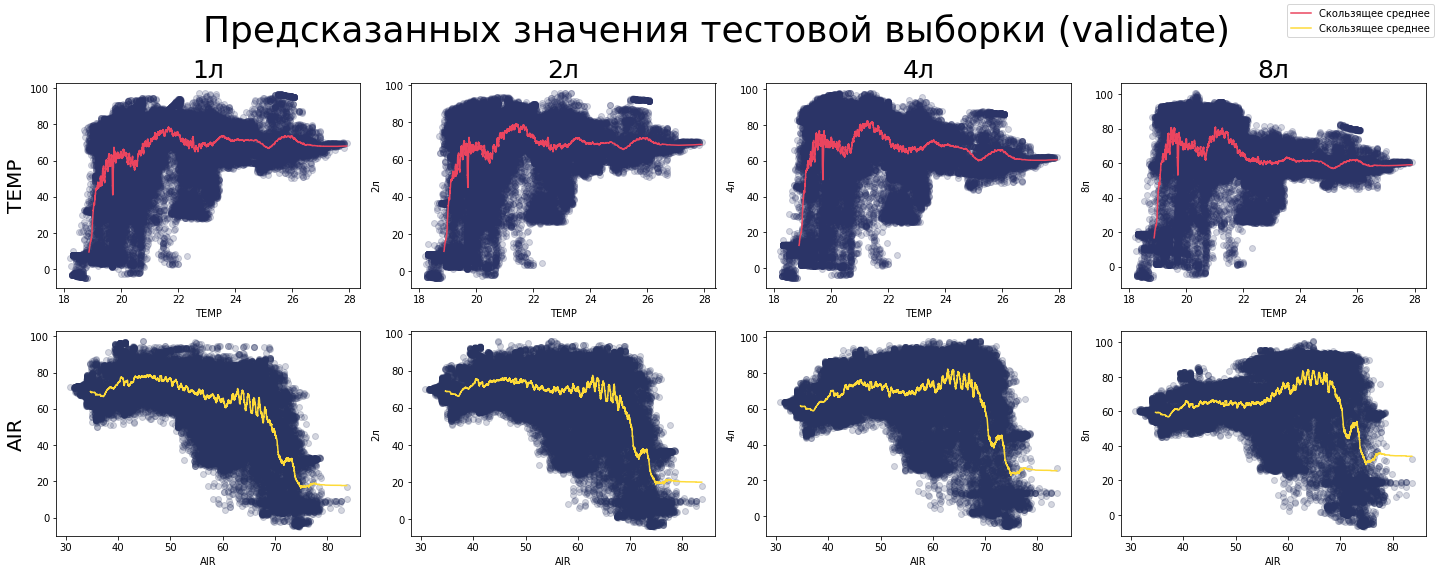

In [24]:
fig, axs = plt.subplots(len(x_n_name), len(preds_name), figsize=(20,8))

for idx_x in range(len(x_n_name)):
    color=colors[idx_x]
    for idx_y in range(len(preds_name)):
        axs[idx_x, idx_y].scatter(x=x_n_original[idx_x], y=preds_val[idx_y], alpha=0.2, c=color[0])
        axs[idx_x, idx_y].plot(x_n[idx_x], moving_averages_preds_val[idx_x][idx_y], c=color[1],label='Скользящее среднее')
        
        axs[idx_x, idx_y].set_xlabel(x_n_name[idx_x])
        axs[idx_x, idx_y].set_ylabel(preds_name[idx_y])
        
for ax, col in zip(axs[0], preds_name):
    ax.set_title(col, fontsize=25, fontweight=25)

for ax, row in zip(axs[:,0], x_n_name):
    ax.set_ylabel(row, fontsize=20, fontweight=25)

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
lines = [lines[0],  lines[-1]]
labels = [labels[0],  labels[-1]]
fig.legend(lines, labels)
fig.suptitle('Предсказанных значения тестовой выборки (validate)', fontsize=36, fontweight=25)
fig.tight_layout()
plt.show()

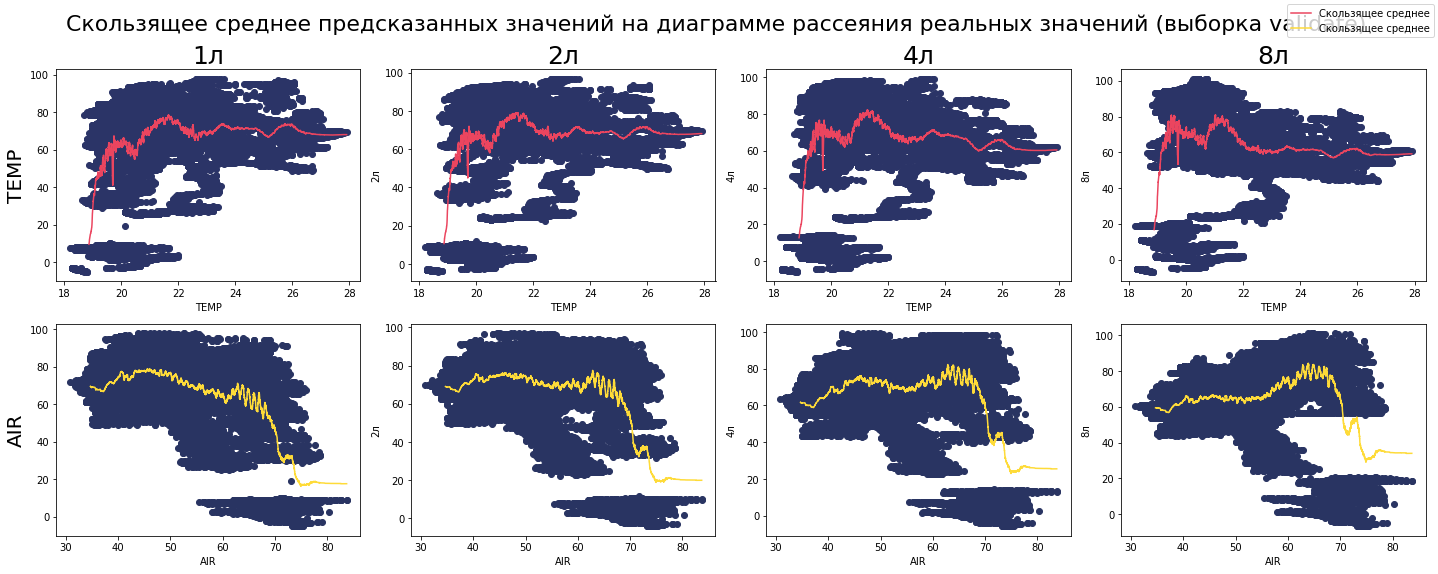

In [25]:
fig, axs = plt.subplots(len(x_n_name), len(preds_name), figsize=(20,8))

for idx_x in range(len(x_n_name)):
    color=colors[idx_x]
    for idx_y in range(len(preds_name)):
        axs[idx_x, idx_y].scatter(x=x_n_original[idx_x], y=val_y[:, idx_y], c=color[0])
        axs[idx_x, idx_y].plot(x_n[idx_x], moving_averages_preds_val[idx_x][idx_y], c=color[1], label='Скользящее среднее')
        
        axs[idx_x, idx_y].set_xlabel(x_n_name[idx_x])
        axs[idx_x, idx_y].set_ylabel(preds_name[idx_y])
        
for ax, col in zip(axs[0], preds_name):
    ax.set_title(col, fontsize=25, fontweight=25)

for ax, row in zip(axs[:,0], x_n_name):
    ax.set_ylabel(row, fontsize=20, fontweight=25)

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
lines = [lines[0],lines[-1]]
labels = [labels[0],labels[-1]]
fig.legend(lines, labels)
fig.suptitle('Скользящее среднее предсказанных значений на диаграмме рассеяния реальных значений (выборка validate)', 
             fontsize=22, fontweight=25)
fig.tight_layout()
plt.show()

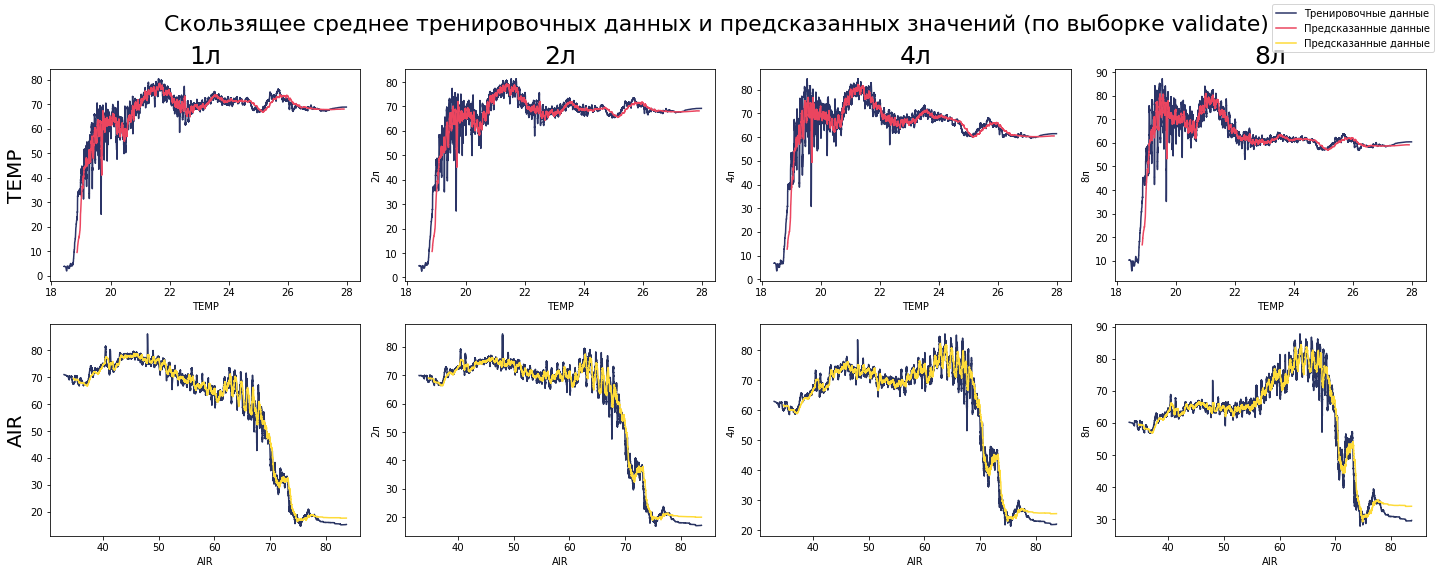

In [26]:
fig, axs = plt.subplots(len(x_n_name), len(preds_name), figsize=(20,8))

x_n_train = [temp_train, air_train]
x_n_val = [temp_val, air_val]

for idx_x in range(len(x_n_name)):
    color=colors[idx_x]
    for idx_y in range(len(preds_name)):
        axs[idx_x, idx_y].plot(x_n_train[idx_x], moving_averages_vals_train[idx_x][idx_y], c=color[0],label='Тренировочные данные')
        axs[idx_x, idx_y].plot(x_n_val[idx_x], moving_averages_preds_val[idx_x][idx_y], c=color[1],label='Предсказанные данные')
        
        axs[idx_x, idx_y].set_xlabel(x_n_name[idx_x])
        axs[idx_x, idx_y].set_ylabel(preds_name[idx_y])
        
for ax, col in zip(axs[0], preds_name):
    ax.set_title(col, fontsize=25, fontweight=25)

for ax, row in zip(axs[:,0], x_n_name):
    ax.set_ylabel(row, fontsize=20, fontweight=25)

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
lines = [lines[0], lines[1], lines[-1]]
labels = [labels[0], labels[1], labels[-1]]
fig.suptitle('Скользящее среднее тренировочных данных и предсказанных значений (по выборке validate)', 
             fontsize=22, fontweight=25)
fig.legend(lines, labels)
fig.tight_layout()
plt.show()

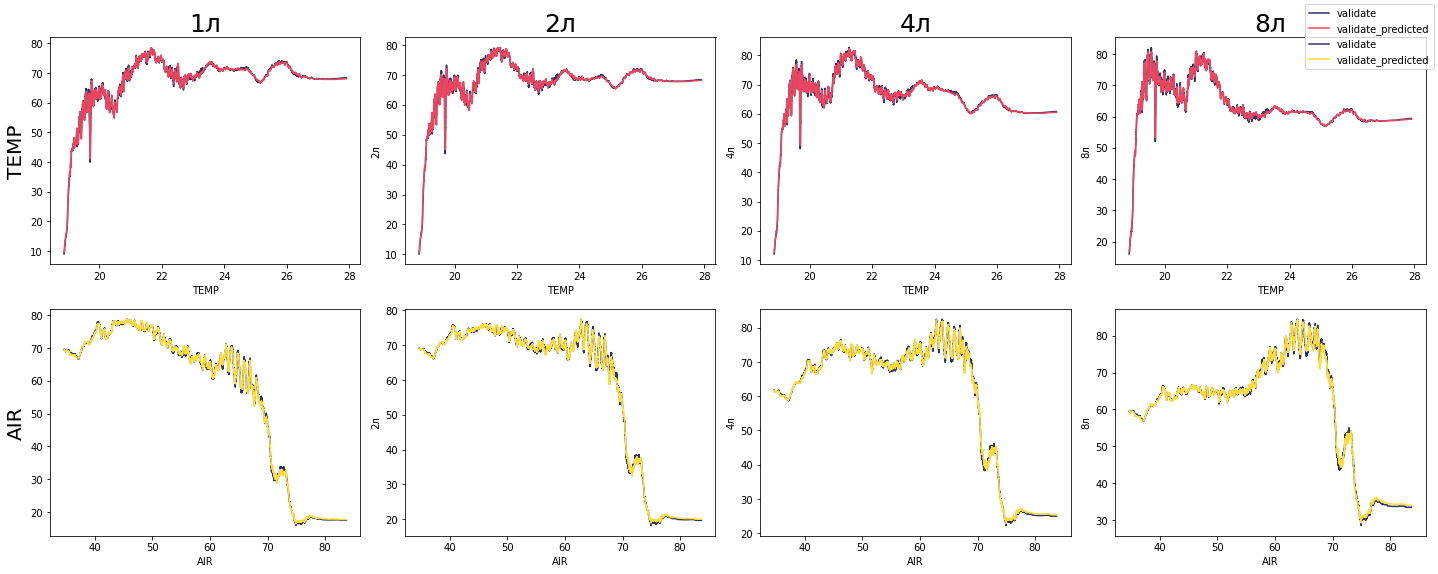

In [27]:
fig, axs = plt.subplots(len(x_n_name), len(preds_name), figsize=(20,8))

x_n_train = [temp_train, air_train]
x_n_val = [temp_val, air_val]

for idx_x in range(len(x_n_name)):
    color=colors[idx_x]
    for idx_y in range(len(preds_name)):
        axs[idx_x, idx_y].plot(x_n_val[idx_x], moving_averages_vals_val[idx_x][idx_y], c=color[0],label='validate')
        axs[idx_x, idx_y].plot(x_n_val[idx_x], moving_averages_preds_val[idx_x][idx_y], c=color[1],label='validate_predicted')
        
        axs[idx_x, idx_y].set_xlabel(x_n_name[idx_x])
        axs[idx_x, idx_y].set_ylabel(preds_name[idx_y])
        
for ax, col in zip(axs[0], preds_name):
    ax.set_title(col, fontsize=25, fontweight=25)

for ax, row in zip(axs[:,0], x_n_name):
    ax.set_ylabel(row, fontsize=20, fontweight=25)

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
lines = [lines[0], lines[1], lines[-2], lines[-1]]
labels = [labels[0], labels[1], labels[-2], labels[-1]]
fig.legend(lines, labels)
fig.tight_layout()
plt.show()